# Milestone 2 : Project proposal and initial analyses 🍻

<hr style="clear:both">
This notebook was made for the ADA course at EPFL. 

Group : BeerADAventure46

**Authors:** \
[Agatha Hunter](https://people.epfl.ch/agatha.hunter)\
[Anne-Valérie Preto](https://people.epfl.ch/anne-valerie.preto)\
[Tristan Carruzzo](https://people.epfl.ch/tristan.carruzzo)\
[Thamin Maurer](https://people.epfl.ch/thamin.maurer)\
[Victor Dubien](https://people.epfl.ch/victor.dubien)


**Supervisor:**\
[Beatriz Borges](https://people.epfl.ch/beatriz.borges)
<hr style="clear:both">



<blockquote>

## Project proposal  📌

**Influence of the serving style on the tasting profile**:

Goal of the project: Use the textual reviews to find for each beer how it was served (either bottle, can or draft) and find how it influences the tasting profile.

Different serving styles may be adopted in different regions or for different types of beer.  The influence of the serving style could influence not only the appearance, but also the aroma, the palate or the taste.
</blockquote>

### TODO LIST FOR THE GROUP:

<input type="checkbox" checked > New architecture of file

<input type="checkbox"> Create functions to import and convert initial files

<input type="checkbox"> More comments on the dataset -> distribution, viz

<input type="checkbox"> For any filtering: how, why ?

<input type="checkbox"> Choose a NLP method -> comment as much as possible, some trials 

<input type="checkbox"> E-mail the proposition to Beatriz

## Datasets 📂
### Import dataset and libraries 📥

In [1]:
import io
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
from langdetect import detect
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression

from textstat import flesch_reading_ease, flesch_kincaid_grade, gunning_fog, smog_index, automated_readability_index, coleman_liau_index, linsear_write_formula, dale_chall_readability_score, text_standard

pd.set_option('display.max_columns', None)

In [2]:
dataset_path = './data/BeerAdvocate/'

In [3]:
def convert_txt_to_csv(dataset_path:str = dataset_path, input_file:str=None, export:bool=False, file_name:str=None):
    """
    Converts a txt file to a csv file.

    Parameters
    ----------
    input_file : str
        The name of the txt file to be converted.
    export : bool
        Whether to export the csv file.
    file_name : str
        The name of the csv file to be exported. If None, the name of the txt file will be used.
    """

    # Define the file path
    file_path = dataset_path + input_file

    # Get the total number of lines in the file
    with io.open(file_path, 'r', encoding='utf-8') as f:
        total_lines = sum(1 for _ in f)
    print(f'Total number of lines: {total_lines}')

    # Initialize an empty dictionary to store the data
    data_dict = {}
    current_key = None
    
    # Use tqdm to visualize progress
    with io.open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in tqdm(lines, total=total_lines, desc='Processing Lines'):
            line = line.strip()
            if line:  # Skip empty lines
                key, value = line.split(':', 1)
                data_dict.setdefault(key.strip(), []).append(value.strip())
                current_key = key
    
    print('Finished processing lines.')
    
    # Create a DataFrame from the dictionary
    file_df = pd.DataFrame(data_dict)
    print('Created DataFrame.')
    
    if export:
        # export the df to csv
        if file_name is None:
            file_name = input_file.split('.')[0]

        output_path = dataset_path + file_name + '.csv'
        file_df.to_csv(output_path, index=False)
        print(f'File exported to {output_path}')
    else:
        print('File not exported.')
    
    return file_df

In [4]:
#ratings_2 = convert_txt_to_csv(input_file='ratings.txt', export=True, file_name='trial_ratings')
#can take a while to run

In [5]:
# Firt time imports : 

#ratings = convert_txt_to_csv(input_file='ratings.txt', export=True, file_name='ratings')
#reviews = convert_txt_to_csv(input_file='reviews.txt', export=True, file_name='reviews')

In [7]:
# Files already converted, so we can load them directly

#ratings = pd.read_csv(dataset_path + 'ratings.csv')
reviews = pd.read_csv(dataset_path + 'reviews.csv')
beers = pd.read_csv(dataset_path + 'beers.csv')
breweries = pd.read_csv(dataset_path + 'breweries.csv')
users = pd.read_csv(dataset_path + 'users.csv')

### Quick display of datasets 🔎

In [8]:
display(beers)

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,166064,Nashe Moskovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.7,NaN,NaN,0,NaN
1,166065,Nashe Pivovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,3.8,NaN,NaN,0,NaN
2,166066,Nashe Shakhterskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.8,NaN,NaN,0,NaN
3,166067,Nashe Zhigulevskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.0,NaN,NaN,0,NaN
4,166063,Zhivoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.5,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280818,19139,Kölsch Ale,885,Summit Station Restaurant & Brewery,Kölsch,3,3,2.71,NaN,NaN,5.0,2.713333,NaN,0,NaN
280819,19140,Nut Brown Ale,885,Summit Station Restaurant & Brewery,English Brown Ale,2,1,3.10,NaN,NaN,5.3,3.250000,NaN,0,NaN
280820,19146,Octoberfest,885,Summit Station Restaurant & Brewery,Märzen / Oktoberfest,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
280821,2805,Scotch Ale,885,Summit Station Restaurant & Brewery,Scotch Ale / Wee Heavy,0,0,NaN,NaN,NaN,7.0,NaN,NaN,0,NaN


In [9]:
display(reviews)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
0,Régab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,4.5,1440064800,nmann08,nmann08.184925,3.25,2.75,3.25,2.75,3.0,2.88,"From a bottle, pours a piss yellow color with ..."
1,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1235127600,StJamesGate,stjamesgate.163714,3.00,3.50,3.50,4.00,3.5,3.67,Pours pale copper with a thin head that quickl...
2,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1142247600,mdagnew,mdagnew.19527,4.00,3.50,3.50,4.00,3.5,3.73,"500ml Bottle bought from The Vintage, Antrim....."
3,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1101898800,helloloser12345,helloloser12345.10867,4.00,3.50,4.00,4.00,4.5,3.98,Serving: 500ml brown bottlePour: Good head wit...
4,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1093860000,cypressbob,cypressbob.3708,4.00,4.00,4.00,4.00,4.0,4.00,"500ml bottlePours with a light, slightly hazy ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2589581,Irvington Pale Ale,19141,Summit Station Restaurant & Brewery,885,American Pale Ale (APA),6.8,1100516400,ecoboy,ecoboy.1641,3.50,3.00,3.50,3.00,3.5,3.18,"It may say APA on this site, but talking to th..."
2589582,Kölsch Ale,19139,Summit Station Restaurant & Brewery,885,Kölsch,5.0,1141038000,jaluria,jaluria.31362,3.50,3.50,3.50,4.00,4.0,3.80,I'll start off reviewing this beer with the fo...
2589583,Kölsch Ale,19139,Summit Station Restaurant & Brewery,885,Kölsch,5.0,1140346800,Dithyramb,dithyramb.4413,3.00,3.00,3.00,2.50,3.0,2.80,Served on draft at the pub. Poured a clear yel...
2589584,Kölsch Ale,19139,Summit Station Restaurant & Brewery,885,Kölsch,5.0,1092132000,ManekiNeko,manekineko.2654,3.00,1.50,1.00,1.50,1.5,1.54,Served on tap at the brewpub in a pint glass.A...


In [10]:
display(breweries)

,id,location,name,nbr_beers
0,39912,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5
1,39913,Kyrgyzstan,Arpa (АРПА),1
2,39914,Kyrgyzstan,Bear Beer,4
3,39915,Kyrgyzstan,Blonder Pub,4
4,39916,Kyrgyzstan,Kellers Bier,2
...,...,...,...,...
16753,128,Germany,Privatbrauerei Franz Joseph Sailer,6
16754,5023,Aruba,Aruba Brewing,0
16755,1573,"United States, New York",John Harvard’s Brewery & Ale House,491
16756,16186,"United States, North Carolina",Triangle Brewing Company,20


In [11]:
display(users)

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,7820,465,nmann08.184925,nmann08,1.199704e+09,"United States, Washington"
1,2521,2504,stjamesgate.163714,StJamesGate,1.191838e+09,"United States, New York"
2,1797,1143,mdagnew.19527,mdagnew,1.116410e+09,Northern Ireland
3,31,31,helloloser12345.10867,helloloser12345,1.101380e+09,Northern Ireland
4,604,604,cypressbob.3708,cypressbob,1.069326e+09,Northern Ireland
...,...,...,...,...,...,...
153699,1,1,everman.532342,Everman,1.291115e+09,"United States, California"
153700,1,1,justin0001.352175,Justin0001,1.248343e+09,"United States, California"
153701,1,0,kyungsup.982216,Kyungsup,1.430561e+09,NaN
153702,1,1,joetex.800347,JoeTex,1.400234e+09,"United States, California"


### Merge datasets 🔗

<div class="alert alert-block alert-danger">
<b>Danger:</b> There's already some small filtering

Plus -> should not be done everytime -> need to create a function for it, what do you think?
</div>

In [ ]:
# rename columns of users to have user_ prefix
users.rename(columns={'nbr_ratings':'user_nbr_ratings', 
                      'nbr_reviews':'user_nbr_reviews', 
                      'joined':'user_joined', 
                      'location':'user_location'}, inplace=True)

# Merge dfs
reviews_users = pd.merge(reviews, users, how='left', on=['user_id', 'user_name'])

# Drop NaN values
reviews_users.dropna(inplace=True)

print('We have {} valid reviews.'.format(reviews_users.shape[0]))

In [ ]:
#rename the columns of beers to contain beer_ prefix
beers.rename(columns={'nbr_ratings':'beer_nbr_ratings', 
                      'nbr_reviews':'beer_nbr_reviews', 
                      'ba_score':'beer_ba_score', 
                      'bros_score':'beer_bros_score', 
                      'avg':'beer_avg',
                      'avg_computed':'beer_avg_computed',
                      'zscore':'beer_zscore',}, 
             inplace=True)

# merge reviews with some columns of beers
reviews_users_beers = pd.merge(reviews_users, beers[['beer_id', 'beer_name','beer_nbr_ratings', 'beer_nbr_reviews', 'beer_ba_score', 'beer_avg']], 
                               how='left', 
                               on=['beer_id', 'beer_name'])

# drop NaN from reviews_users_beers
reviews_users_beers.dropna(inplace=True)

print('We have {} valid reviews'.format(reviews_users_beers.shape[0]))

In [ ]:
# rename columns of breweries to contain brewery_ prefix
breweries.rename(columns={'id':'brewery_id', 
                          'location':'brewery_location',
                          'name':'brewery_name',
                          'nbr_beers':'brewery_nbr_beers',
                          }, 
                 inplace=True)

# merge reviews with breweries
reviews_users_beers_breweries = pd.merge(reviews_users_beers, breweries, 
                               how='left', 
                               on=['brewery_id', 'brewery_name'])

# drop NaN from reviews_users_beers_breweries
reviews_users_beers_breweries.dropna(inplace=True)

print('We have {} valid reviews'.format(reviews_users_beers_breweries.shape[0]))

In [ ]:
# Save to csv
#reviews_users_beers_breweries.to_csv(dataset_path + 'BeerAdvocateMerged.csv', index=False)

In [12]:
df = pd.read_csv(dataset_path + 'BeerAdvocateMerged.csv')

### Filter datasets ✂️

<div class="alert alert-block alert-danger">
<b>Danger:</b> Comment EVERY filtering
</div>

In [13]:
df.sample(3)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,user_nbr_ratings,user_nbr_reviews,user_joined,user_location,beer_nbr_ratings,beer_nbr_reviews,beer_ba_score,beer_avg,brewery_location,brewery_nbr_beers
615796,Anchor Porter,61,Anchor Brewing Company,28,American Porter,5.6,1155549600,plaztikjezuz,plaztikjezuz.12104,4.0,3.5,4.0,4.0,4.0,3.88,bought a 12 oz bottle at odies big ten in lans...,351,351,1.103454e+09,"United States, Michigan",3685.0,1545.0,92.0,4.10,"United States, California",79.0
2049758,St. Bernardus Abt 12,1708,Brouwerij St. Bernardus NV,259,Quadrupel (Quad),10.0,1079607600,SeanChouffe,seanchouffe.1993,5.0,4.5,5.0,5.0,5.0,4.88,A deep transparent ruby red color with plenty ...,204,204,1.051438e+09,"United States, New Mexico",9520.0,2791.0,98.0,4.42,Belgium,18.0
704310,Fat Weasel Ale,2321,Steinhaus Brewing Co.,562,American Strong Ale,7.1,1190714400,Reidrover,reidrover.1347,2.0,2.0,2.0,2.0,2.0,2.00,"This is wierd. NO way it resembles an amber, i...",1861,1861,1.042542e+09,"United States, Oregon",271.0,152.0,72.0,3.01,"United States, California",22.0


## Data enrichment 🍺
### Serving type 🍾🥤🚰

>Since our goal is to look at the influence of the serving style, we need to know how each beer was served. 
For now, we use a naive approach. We only look at whether a word specific to as service style has been used. 


In [14]:
# Create 3 different columns according to the text review, "bottle", "can", "draft"

bottle = ['bottle', 'bottled', 'bottles']
can = [' can ', 'canned', ' cans ']
draft = ['draft', 'draught', 'tap', 'taps']
# Create different columns if review text contains the word
df['bottle'] = df['text'].apply(lambda x: any(ele in x.lower() for ele in bottle))
df['can'] = df['text'].apply(lambda x: any(ele in x.lower() for ele in can))
df['draft'] = df['text'].apply(lambda x: any(ele in x.lower() for ele in draft))

In [15]:
# remove every row where columns bottle, can and draft are all False
df = df[df[['bottle', 'can', 'draft']].any(axis=1)]
# display(df.sample(3))
# print('We have {} valid reviews'.format(df.shape[0]))

# remove every row with more than 1 true
df = df[df[['bottle', 'can', 'draft']].sum(axis=1) == 1]
# display(df.sample(3))
# print('We have {} valid reviews'.format(df.shape[0]))

#create a new column with the serving type
df['serving_type'] = df[['bottle', 'can', 'draft']].idxmax(axis=1)

# drop the columns bottle, can and draft
df.drop(['bottle', 'can', 'draft'], axis=1, inplace=True)

display(df.sample(3))

# print the number of reviews for each serving type
df['serving_type'].value_counts(normalize=False)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,user_nbr_ratings,user_nbr_reviews,user_joined,user_location,beer_nbr_ratings,beer_nbr_reviews,beer_ba_score,beer_avg,brewery_location,brewery_nbr_beers,serving_type
268544,Leipziger Gose,10683,Gasthaus & Gosebrauerei Bayerischer Bahnhof,4909,Gose,4.5,1114941600,Globetrotter,globetrotter.1845,4.0,4.5,3.5,3.5,3.5,3.77,This gem appeared on the shelves of Moscow's p...,1170,1170,1.049278e+09,"United States, Virginia",984.0,468.0,87.0,3.90,Germany,36.0,bottle
84045,Carta Blanca,1284,"Cervecería Cuauhtémoc Moctezuma, S.A. de C.V.",57,American Adjunct Lager,4.5,1259233200,jrallen34,jrallen34.346085,2.0,1.5,1.5,2.5,3.0,2.23,I drank this from a can into a glass in Puerto...,2380,1898,1.246529e+09,"United States, Illinois",512.0,200.0,66.0,2.74,Mexico,55.0,can
354672,Porter,14314,Nøgne Ø - Det Kompromissløse Bryggeri A/S,7730,Baltic Porter,7.0,1245319200,oelergud,oelergud.1154,4.0,4.5,4.5,4.5,4.5,4.47,Tall slim 1 pint .9oz dark brown glass bottle ...,597,596,1.039604e+09,"United States, Virginia",407.0,240.0,90.0,4.05,Norway,130.0,bottle


serving_type
bottle    581958
can       166376
draft     133260
Name: count, dtype: int64

## Data filtering 🧹
Number of valid reviews per beer and users & average rating per beer

### Filtering on amount of reviews

In [16]:
# compute the number of valid reviews per user
df['user_nbr_reviews_computed'] = df.groupby('user_id')['user_id'].transform('count')

# compute the number of valid reviews per beer
df['beer_nbr_reviews_computed'] = df.groupby('beer_id')['beer_id'].transform('count')

# compute the avg rating per beer
df['beer_avg_computed'] = df.groupby('beer_id')['rating'].transform('mean')

df.sample(3)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,user_nbr_ratings,user_nbr_reviews,user_joined,user_location,beer_nbr_ratings,beer_nbr_reviews,beer_ba_score,beer_avg,brewery_location,brewery_nbr_beers,serving_type,user_nbr_reviews_computed,beer_nbr_reviews_computed,beer_avg_computed
1276833,Fourteen Ale,51007,Weyerbacher Brewing Co.,392,Wheatwine,11.8,1266836400,AleWatcher,alewatcher.291406,4.0,4.00,4.0,3.5,4.00,3.80,Bottle poured into chalice.Got this as an extr...,1136,903,1.232881e+09,"United States, Illinois",272.0,193.0,85.0,3.79,"United States, Pennsylvania",184.0,bottle,401,92,3.762935
851651,Samuel Adams Escape Route,109554,Boston Beer Company (Samuel Adams),35,Kölsch,5.0,1392634800,Bierwolf,bierwolf.655307,2.5,2.75,3.0,3.0,2.75,2.86,12 ounce bottle served in a Kölsch style glass...,103,73,1.326884e+09,"United States, Missouri",754.0,149.0,79.0,3.47,"United States, Massachusetts",285.0,bottle,40,57,3.530702
556219,Flipside Red IPA,98495,Sierra Nevada Brewing Co.,140,American Amber / Red Ale,6.2,1382436000,biboergosum,biboergosum.168458,4.5,3.75,4.0,4.0,4.00,3.97,"12oz bottle, 2013 edition, from a grocery stor...",6616,6616,1.193569e+09,Canada,2860.0,411.0,86.0,3.84,"United States, California",574.0,bottle,3316,120,3.843000


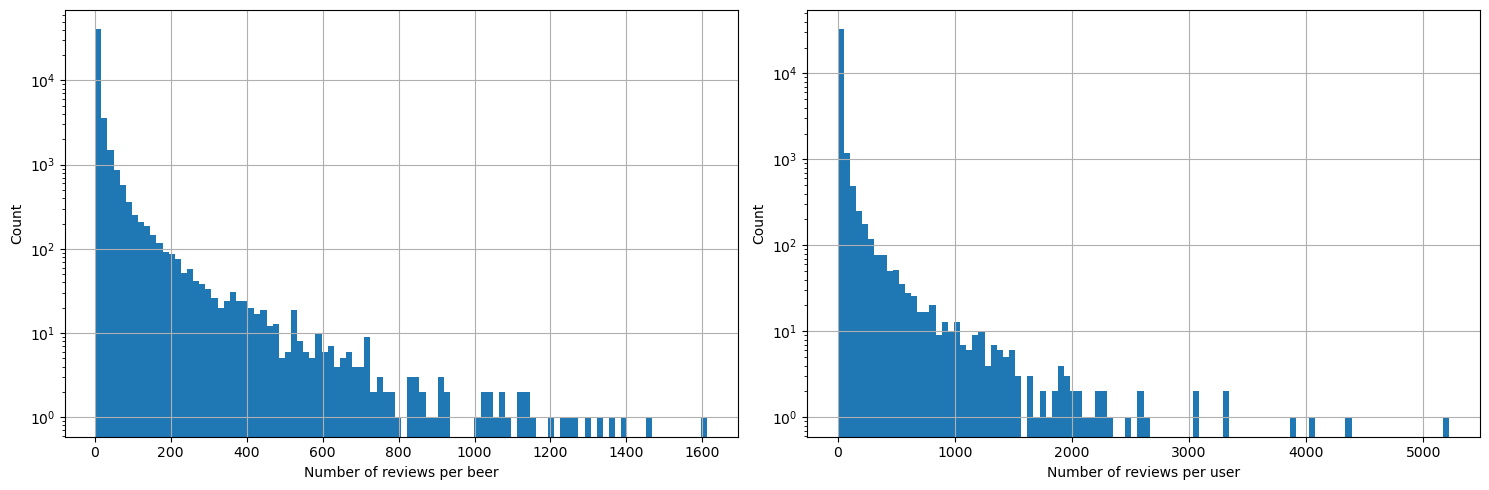

In [17]:
plt.figure(figsize=(15, 5))

# group the reviews by beer_id and show a histogram of the number of reviews computed
plt.subplot(1, 2, 1)
df.groupby('beer_id')['beer_nbr_reviews_computed'].mean().hist(bins=100, log=True)
plt.xlabel('Number of reviews per beer')
plt.ylabel('Count')

# group the reviews by user_id and show a histogram of the number of reviews computed
plt.subplot(1, 2, 2)
df.groupby('user_id')['user_nbr_reviews_computed'].mean().hist(bins=100, log=True)
plt.xlabel('Number of reviews per user')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [19]:
#Filtering to remove users and beers with less reviews

min_nbr_reviews_per_user = 0
min_nbr_reviews_per_beer = 20

len0 = df.shape[0]

# remove every row where the number of reviews per user is less than min_nbr_reviews_per_user
df_filter = df[df['user_nbr_reviews_computed'] >= min_nbr_reviews_per_user].copy(deep=True)

# remove every row where the number of reviews per beer is less than min_nbr_reviews_per_beer
df_filter_full = df_filter[df_filter['beer_nbr_reviews_computed'] >= min_nbr_reviews_per_beer].copy(deep=True)

print('We removed {} rows, leaving us with {} %% of the original dataset'.format(len0 - df_filter_full.shape[0], round(df_filter_full.shape[0] / len0 * 100, 2)))
print('We have {} valid reviews'.format(df_filter_full.shape[0]))

# print the number of reviews for each serving type
df_filter_full['serving_type'].value_counts(normalize=False)

We removed 196939 rows, leaving us with 77.66 %% of the original dataset
We have 684655 valid reviews


serving_type
bottle    474929
can       127582
draft      82144
Name: count, dtype: int64

### Filter on readability score of the reviews 📝

In [20]:
df_sample = df_filter_full.sample(n=1000, random_state=46)

<Axes: >

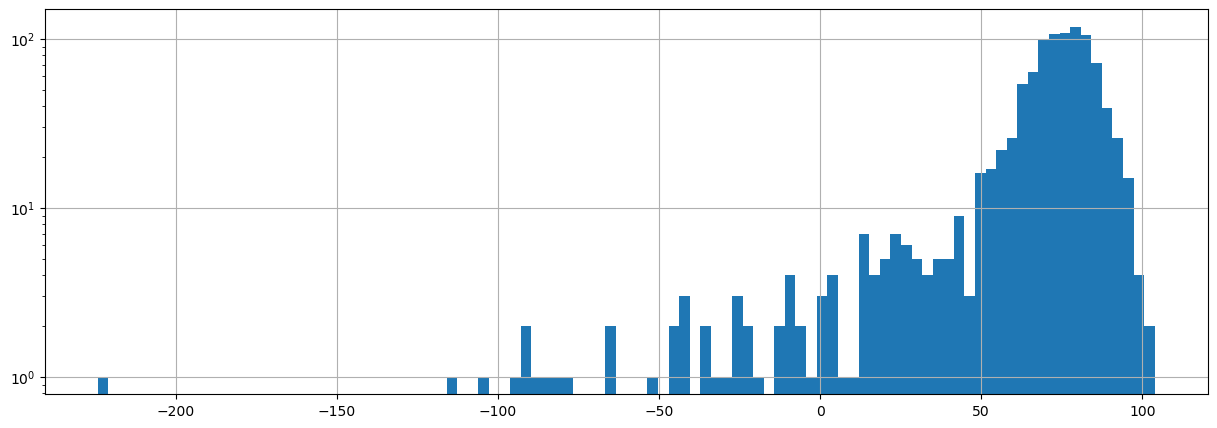

In [21]:
df_sample['readability_score'] = df_sample['text'].apply(lambda x: flesch_reading_ease(x) if isinstance(x, str) else None)
df_sample['readability_score'].hist(bins=100, figsize=(15, 5), log=True)

In [22]:
# printing some reviews based on readability score

df_sample[df_sample['readability_score'] < 20]['text'].count()

# for row in df_sample[df_sample['readability_score'] > 96]['text']:
#     print(row)
#     print('----------------------')

59

In [ ]:
# remove reviews with bad readability score



### Countries grouping 🌍

In [ ]:
countries = pd.read_csv('data/countries.csv', usecols=['name', 'region', 'sub-region'])
countries.sample(1)

,name,region,sub-region
234,United Kingdom of Great Britain and Northern I...,Europe,Northern Europe


### Visualization 📊

In [24]:
df = df_filter_full.copy(deep=True)

In [25]:
# print some reviews for each serving type
print('Reviews with bottle:\n')
for text in df[df['serving_type'] == 'bottle']['text'].sample(1):
    print(text)
    print('----------------------')
print('Reviews with can:\n')
for text in df[df['serving_type'] == 'can']['text'].sample(1):
    print(text)
    print('----------------------')
print('Reviews with draft:\n')
for text in df[df['serving_type'] == 'draft']['text'].sample(1):
    print(text)
    print('----------------------')

Reviews with bottle:

750 ml bottle from 2007. been sitting in the basement relatively regular temp A-- pours a ruby colored opaque bodied beauty. thin cream color on top, but a bright red hue through all the color. S- very rich and inviting. cellaring seems to definitely gone well for this one. crisp and deep scented maltiness and a huge complexity.T- starts out with a mild maltiness that only seems to grow as the flavor lingers ont he tongue. growing malty characteristics and a big burst of flavor at the end. hops keep it bitter, but seem pretty much faded by now. M- thick and creamy all around. light carbonation and lingering taste.D- a great sipper. cellared this beer develops a great complexity
----------------------
Reviews with can:

I typically drink this guy right out of the can but have poured once or twice.A: &quot;Thin&quot; looking. Clear, looks like a light beer almost.S: Wheat, malt, mainly fruit. Generally weakT: First time I had this I was surprised. The wheat sticks o

In [26]:
# print the average value of the rating for each serving type
comp_str = 'rating'
print('Average ' + comp_str + ' for bottle: ', round(df[df['serving_type'] == 'bottle'][comp_str].mean(), 3))
print('Average ' + comp_str + ' for can: ', round(df[df['serving_type'] == 'can'][comp_str].mean(), 3))
print('Average ' + comp_str + ' for draft: ', round(df[df['serving_type'] == 'draft'][comp_str].mean(), 3))

Average rating for bottle:  3.867
Average rating for can:  3.818
Average rating for draft:  3.906


/Users/annevaleriepreto/miniforge3/envs/ADA/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/annevaleriepreto/miniforge3/envs/ADA/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/annevaleriepreto/miniforge3/envs/ADA/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/annevaleriepreto/miniforge3/envs/ADA/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

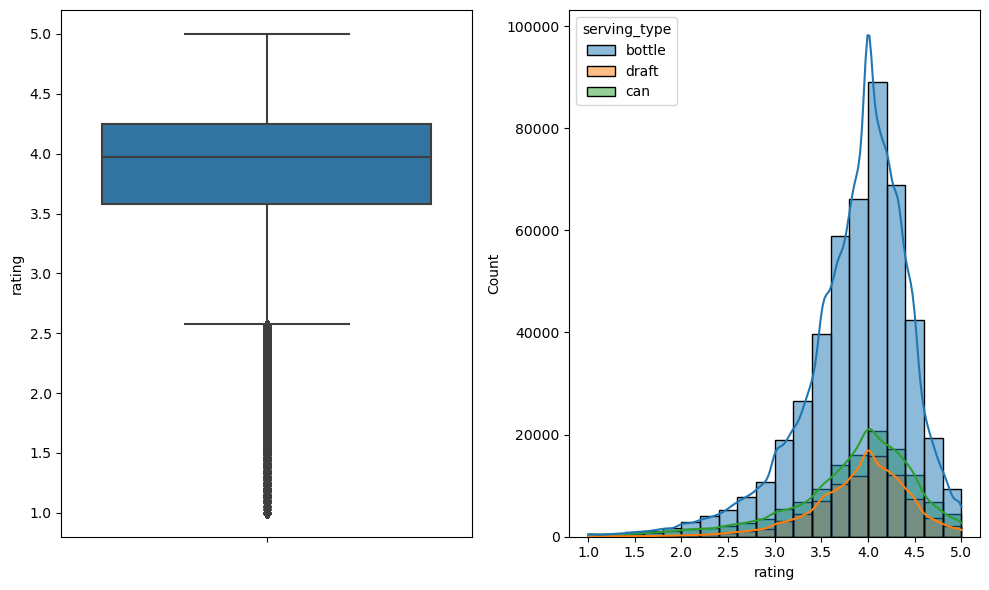

In [27]:
# show boxplot and histograms of ratings for bottle, can and draft
plt.figure(figsize=(10, 6))
plt.subplot(121)
sns.boxplot(data=df, hue='serving_type', y='rating')
plt.subplot(122)
sns.histplot(data=df, hue='serving_type', x='rating', kde=True, bins=20)
plt.tight_layout()
plt.show()

# Statistical Analysis 📈

### Measure the impact of each aspect on rating 📏

/Users/annevaleriepreto/miniforge3/envs/ADA/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/annevaleriepreto/miniforge3/envs/ADA/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/annevaleriepreto/miniforge3/envs/ADA/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/annevaleriepreto/miniforge3/envs/ADA/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

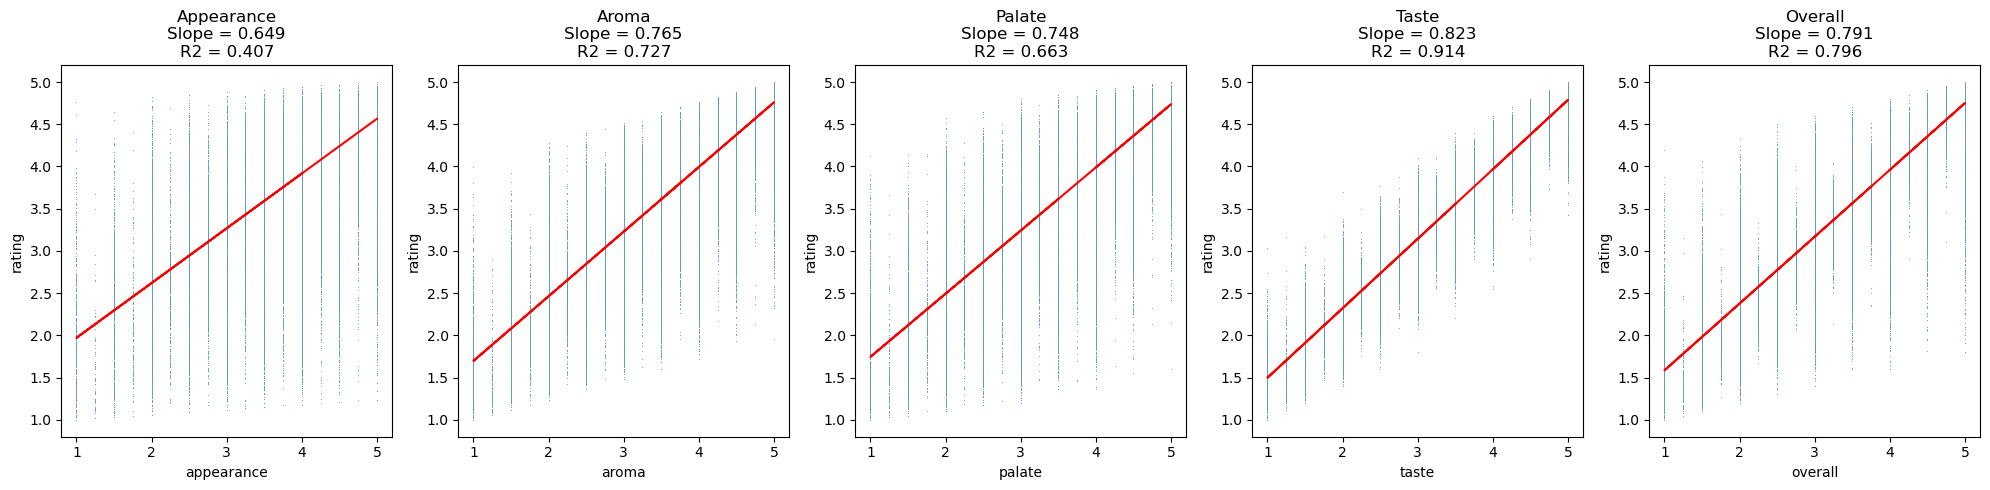

In [28]:
# fit a linear regression line to the data for all 5 aspects
reg1 = LinearRegression().fit(df[['appearance']], df['rating'])
reg2 = LinearRegression().fit(df[['aroma']], df['rating'])
reg3 = LinearRegression().fit(df[['palate']], df['rating'])
reg4 = LinearRegression().fit(df[['taste']], df['rating'])
reg5 = LinearRegression().fit(df[['overall']], df['rating'])

# create subplots for all 5 aspects
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

# plot the data and regression line for each aspect
sns.scatterplot(data=df, x='appearance', y='rating', s=0.5, ax=axs[0])
axs[0].plot(df[['appearance']], reg1.predict(df[['appearance']]), color='red')
axs[0].set_title('Appearance\nSlope = ' + str(round(reg1.coef_[0], 3)) + '\nR2 = ' + str(round(reg1.score(df[['appearance']], df['rating']), 3)))

sns.scatterplot(data=df, x='aroma', y='rating', s=0.5, ax=axs[1])
axs[1].plot(df[['aroma']], reg2.predict(df[['aroma']]), color='red')
axs[1].set_title('Aroma\nSlope = ' + str(round(reg2.coef_[0], 3)) + '\nR2 = ' + str(round(reg2.score(df[['aroma']], df['rating']), 3)))

sns.scatterplot(data=df, x='palate', y='rating', s=0.5, ax=axs[2])
axs[2].plot(df[['palate']], reg3.predict(df[['palate']]), color='red')
axs[2].set_title('Palate\nSlope = ' + str(round(reg3.coef_[0], 3)) + '\nR2 = ' + str(round(reg3.score(df[['palate']], df['rating']), 3)))

sns.scatterplot(data=df, x='taste', y='rating', s=0.5, ax=axs[3])
axs[3].plot(df[['taste']], reg4.predict(df[['taste']]), color='red')
axs[3].set_title('Taste\nSlope = ' + str(round(reg4.coef_[0], 3)) + '\nR2 = ' + str(round(reg4.score(df[['taste']], df['rating']), 3)))

sns.scatterplot(data=df, x='overall', y='rating', s=0.5, ax=axs[4])
axs[4].plot(df[['overall']], reg5.predict(df[['overall']]), color='red')
axs[4].set_title('Overall\nSlope = ' + str(round(reg5.coef_[0], 3)) + '\nR2 = ' + str(round(reg5.score(df[['overall']], df['rating']), 3)))

plt.tight_layout()
plt.show()

# should still add confidence intervals

It seems like Taste as the biggest impact on the rating while appearance has the least impact.

### Hypothesis testing on the new labels

In [29]:
def do_ttest(type1, type2, category):
    ttest = ttest_ind(df[df['serving_type'] == type1][category],df[df['serving_type'] == type2][category])
    if ttest[1] > 0.05:
        print('The p-value is high (' + str(ttest[1]) + '), so we cannot reject the null hypothesis that the two samples have the same average')
    else:
        print('The p-value is very low (' + str(ttest[1]) + '), so we can reject the null hypothesis that the two samples have the same average')

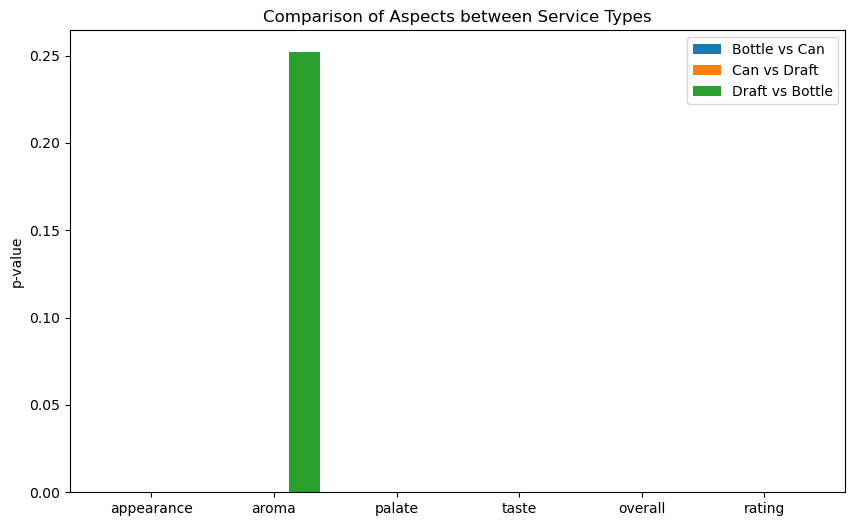

In [30]:
# define the columns to compare
columns = ['appearance', 'aroma', 'palate', 'taste', 'overall', 'rating']

# create an empty matrix to store the p-values
p_values = np.zeros((len(columns), 3))

# perform the t-test and store the p-values in the matrix
for i in range(len(columns)):
    ttest1 = ttest_ind(df[df['serving_type'] == 'bottle'][columns[i]], df[df['serving_type'] == 'can'][columns[i]])
    ttest2 = ttest_ind(df[df['serving_type'] == 'can'][columns[i]], df[df['serving_type'] == 'draft'][columns[i]])
    ttest3 = ttest_ind(df[df['serving_type'] == 'draft'][columns[i]], df[df['serving_type'] == 'bottle'][columns[i]])
    p_values[i][0] = ttest1[1]
    p_values[i][1] = ttest2[1]
    p_values[i][2] = ttest3[1]

# create the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(columns))
width = 0.25
rects1 = ax.bar(x - width, p_values[:,0], width, label='Bottle vs Can')
rects2 = ax.bar(x, p_values[:,1], width, label='Can vs Draft')
rects3 = ax.bar(x + width, p_values[:,2], width, label='Draft vs Bottle')
ax.set_xticks(x)
# ax.set_yscale('log')
ax.set_xticklabels(columns)
ax.set_ylabel('p-value')
ax.set_title('Comparison of Aspects between Service Types')
ax.legend()
plt.show()

All the p-values are below 0.05 (expect 1), so we can reject the null hypothesis and conclude that there is a significant difference between the groups.

In [31]:
# t-test for aroma betwwen draft and bottle
do_ttest('draft', 'bottle', 'aroma')

The p-value is high (0.2518547335858365), so we cannot reject the null hypothesis that the two samples have the same average


/Users/annevaleriepreto/miniforge3/envs/ADA/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/annevaleriepreto/miniforge3/envs/ADA/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/annevaleriepreto/miniforge3/envs/ADA/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


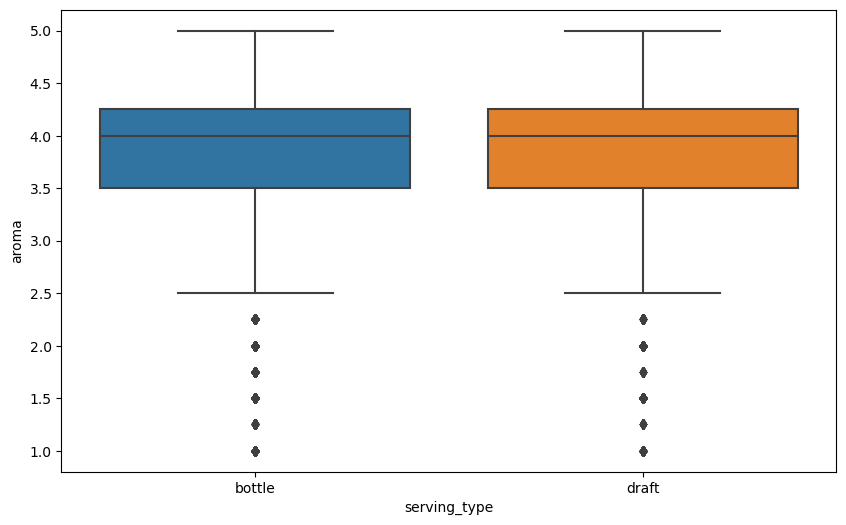

In [32]:
# show a boxplot of aroma for draft and bottle
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df['serving_type'].isin(['draft', 'bottle'])], x='serving_type', y='aroma')
plt.show()